### Apology for late submission due to unforeseen & unavoidable circumstances

## Day 10  - Univariate Analysis
## write 10 Hypothesis from the dataset provided
#### Problem Statement A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons -

The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
A sizeable department has to be maintained, for the purposes of recruiting new talent

More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company
Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.


Since you are one of the star analysts at the firm, this project has been given to you.


Goal of the case study You are required to model the probability of attrition. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.


Columns

EmployeeIDEmployee number/id
EnvironmentSatisfactionWork Environment Satisfaction Level

JobSatisfactionJob Involvement Level Job Involvement Level Job Involvement Level

WorkLifeBalanceWork life balance level

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("general_data.csv")
dataset.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [4]:
dataset.isnull()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4406,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4407,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4408,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
dataset.dropna()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,1,4405,Female,...,1.0,Y,18,8,0,6.0,2,6,1,5
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2


In [6]:
dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4405    False
4406    False
4407    False
4408    False
4409    False
Length: 4410, dtype: bool

In [7]:
dataset.drop_duplicates()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [8]:
dataset.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


#### The mean of salary hike in IQR is 14.66 percentage

#### The mean of TotalWorkingYears  in IQR is 10.33 years

#### The mean of YearsAtCompany	 in IQR is 5.66 years

In [9]:
dataset.median()

Age                           36.0
DistanceFromHome               7.0
Education                      3.0
EmployeeCount                  1.0
EmployeeID                  2205.5
JobLevel                       2.0
MonthlyIncome              49190.0
NumCompaniesWorked             2.0
PercentSalaryHike             14.0
StandardHours                  8.0
StockOptionLevel               1.0
TotalWorkingYears             10.0
TrainingTimesLastYear          3.0
YearsAtCompany                 5.0
YearsSinceLastPromotion        1.0
YearsWithCurrManager           3.0
dtype: float64

In [10]:
df = dataset[['Age','DistanceFromHome','Education','EmployeeCount','EmployeeID','JobLevel','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager']].mode()
df.dropna()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,35.0,2.0,3.0,1.0,1,1.0,23420.0,1.0,11.0,8.0,0.0,10.0,2.0,5.0,0.0,2.0


In [11]:
df = dataset[['Age','DistanceFromHome','Education','EmployeeCount','EmployeeID','JobLevel','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager']].var()
df

Age                        8.341719e+01
DistanceFromHome           6.569144e+01
Education                  1.048438e+00
EmployeeCount              0.000000e+00
EmployeeID                 1.621042e+06
JobLevel                   1.224760e+00
MonthlyIncome              2.215480e+09
NumCompaniesWorked         6.244436e+00
PercentSalaryHike          1.338907e+01
StandardHours              0.000000e+00
StockOptionLevel           7.257053e-01
TotalWorkingYears          6.056298e+01
TrainingTimesLastYear      1.661465e+00
YearsAtCompany             3.751728e+01
YearsSinceLastPromotion    1.037935e+01
YearsWithCurrManager       1.272582e+01
dtype: float64

In [12]:
dataset.skew()   #For finding about the symmetry

Age                        0.413005
DistanceFromHome           0.957466
Education                 -0.289484
EmployeeCount              0.000000
EmployeeID                 0.000000
JobLevel                   1.024703
MonthlyIncome              1.368884
NumCompaniesWorked         1.026767
PercentSalaryHike          0.820569
StandardHours              0.000000
StockOptionLevel           0.968321
TotalWorkingYears          1.116832
TrainingTimesLastYear      0.552748
YearsAtCompany             1.763328
YearsSinceLastPromotion    1.982939
YearsWithCurrManager       0.832884
dtype: float64

In [13]:
dataset.kurt()  #For finding the peak value , Lepokurtic, mesokurtic or platykurtic

Age                       -0.405951
DistanceFromHome          -0.227045
Education                 -0.560569
EmployeeCount              0.000000
EmployeeID                -1.200000
JobLevel                   0.395525
MonthlyIncome              1.000232
NumCompaniesWorked         0.007287
PercentSalaryHike         -0.302638
StandardHours              0.000000
StockOptionLevel           0.361086
TotalWorkingYears          0.912936
TrainingTimesLastYear      0.491149
YearsAtCompany             3.923864
YearsSinceLastPromotion    3.601761
YearsWithCurrManager       0.167949
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1ae69005e10>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae6901d4e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae69005908>],
 'medians': [<matplotlib.lines.Line2D at 0x1ae6901db70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ae6901deb8>],
 'means': []}

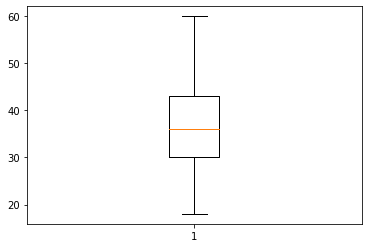

In [14]:
box_plot = dataset.Age
plt.boxplot(box_plot)  #Age is normally distributed

{'whiskers': [<matplotlib.lines.Line2D at 0x1ae6c0efc18>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae6c0fb2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae6c0ef908>],
 'medians': [<matplotlib.lines.Line2D at 0x1ae6c0fb940>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ae6c0fbc88>],
 'means': []}

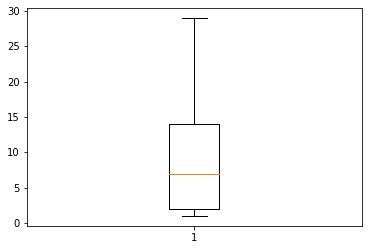

In [15]:
box_plot = dataset.DistanceFromHome 
plt.boxplot(box_plot)  # the distance from house for all employees is positively skewed

{'whiskers': [<matplotlib.lines.Line2D at 0x1ae6c14bd30>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae6c15a470>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae6c14bbe0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ae6c15ab00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ae6c15ae48>],
 'means': []}

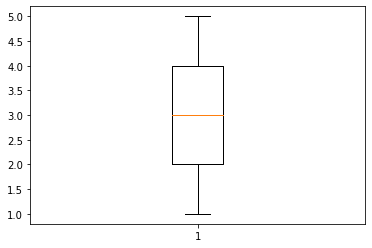

In [16]:
box_plot = dataset.Education  
plt.boxplot(box_plot) 

{'whiskers': [<matplotlib.lines.Line2D at 0x1ae6c1b9eb8>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae6c1c75f8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae6c1b9d68>],
 'medians': [<matplotlib.lines.Line2D at 0x1ae6c1c7c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ae6c1c7fd0>],
 'means': []}

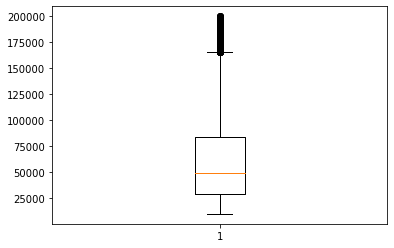

In [17]:
box_plot = dataset.MonthlyIncome    
plt.boxplot(box_plot)  

#### Monthly incomeis right skewed as few get more than 1,60,000


{'whiskers': [<matplotlib.lines.Line2D at 0x1ae6c2286d8>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae6c228dd8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae6c228588>],
 'medians': [<matplotlib.lines.Line2D at 0x1ae6c2334a8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ae6c2337f0>],
 'means': []}

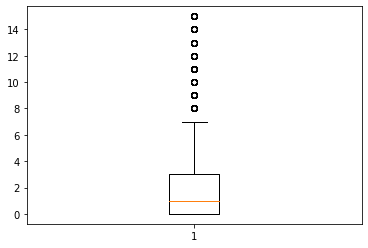

In [18]:
box_plot = dataset.YearsSinceLastPromotion   
plt.boxplot(box_plot) 

####   'YearsSinceLastPromotion' has several outliers which has got promotion in past years

{'whiskers': [<matplotlib.lines.Line2D at 0x1ae6c289c88>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae6c2973c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae6c289b38>],
 'medians': [<matplotlib.lines.Line2D at 0x1ae6c297a58>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ae6c297da0>],
 'means': []}

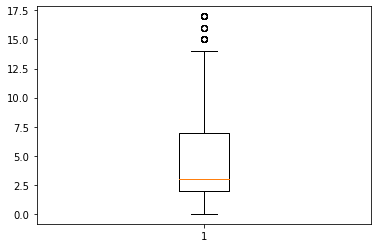

In [19]:
box_plot = dataset.YearsWithCurrManager  
plt.boxplot(box_plot) 

#### The YearsWithCurrManager   has a positive skewness as there are many outliers since very few have more than 14 years of experience with their currrent manager.

## Hypothesis:
1. People who worked in >= 3 companies have salaries >80000


2. Irrespective of years of experience all work for standard 8 hours only.


3. There are many people with age<40 years


4. many People who are working has to travel less than 15 Km


5. very few people have experience >=12 years with their current managers


6. People with more than 3 education work in R&D


7. people with total working years more than 15 years has a percent salary hike grater than 20%


8. People with experience more than 15 years, get promoted slowly


9. People who travel rarely are not the ones leaving companies.


10. Male person has to travel more than the female person.